## 1. Import Library and read csv file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
#read Dataset from csv file
path = './Dataset/Bengaluru_House_Data.csv'
df1 = pd.read_csv(path)
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
x = df1.info()
x

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


## 2. Data Preprocessing

In [6]:
# Count categorical values
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
avlty = df1.groupby('availability')['availability'].agg('count')

avlty.shape,
avlty

availability
14-Jul                      1
14-Nov                      1
15-Aug                      1
15-Dec                      1
15-Jun                      1
                        ...  
22-Mar                      3
22-May                     10
22-Nov                      2
Immediate Possession       16
Ready To Move           10581
Name: availability, Length: 81, dtype: int64

In [8]:
balc = df1.groupby('balcony')['balcony'].agg('count')
balc

balcony
0.0    1029
1.0    4897
2.0    5113
3.0    1672
Name: balcony, dtype: int64

In [9]:
df1.groupby('society')['society'].agg('count')

society
3Codeli    2
7 ise P    1
A idse     2
A rtsai    1
ACersd     1
          ..
Zonce E    2
Zostaa     3
i1ncyRe    1
i1odsne    1
i1rtsCo    3
Name: society, Length: 2688, dtype: int64

In [10]:
df1.groupby('location')['location'].agg('count')

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1305, dtype: int64

In [11]:
sqfit = df1.groupby('total_sqft')['total_sqft'].agg('count')
sqfit.shape

(2117,)

In [12]:
sqfit

total_sqft
1                1
1.25Acres        1
1.26Acres        1
1000           172
1000 - 1285      1
              ... 
995             10
996              4
997              2
998              1
999              3
Name: total_sqft, Length: 2117, dtype: int64

## 3. Data Analysis and some Feature Engineering 

### Drop some columns which is not more important such as availability, balcony, society, area_type

In [13]:
df2 = df1.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [14]:
df2.shape, df2.isnull().sum()

((13320, 5),
 location       1
 size          16
 total_sqft     0
 bath          73
 price          0
 dtype: int64)

In [15]:
# Drop null value columns 
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [16]:
df3.shape

(13246, 5)

In [17]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

**Observation:**
In the size attribute there are some common attribute value but written in different way for example 4 BHK and 4 Bedroom both are some, same as follow for different.

In this case we can change the attribute value by there only numaric value so.

In [18]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

C:\Users\Amitesh\AppData\Local\Temp\ipykernel_1716\2716584372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [19]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [20]:
df3 = df3.drop(['size'], axis='columns')

In [21]:
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [22]:
df3['location'].nunique()

1304

**That means location have 1304 unique values... and this is important for us to predict.**
We have cross check or examine the location

In [23]:
df3.location=df3['location'].apply(lambda x: x.strip()) #Remove the space if at starting and ending..
df3['location'].nunique()

1293

**We have work on location** due to these have more category so we need to check can we reduce the dimension... or not?

In [24]:
loc = df3['location'].value_counts(ascending=False) ## count the unique value frequency
print(loc), len(loc)

Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64


(None, 1293)

In [25]:
loc.values.sum()

13246

In [26]:
len(loc[loc>10])  #length of the atribute value which frequency is less than 10 we can set in other ... for dimensionality reduction. full len is 1293 category

241

In [27]:
len(loc[loc<=10])

1052

**Observation and do:** Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [28]:
location_less_than_10 = loc[loc<=10]
len(location_less_than_10)

1052

In [29]:
df3.location = df3.location.apply(lambda x: 'other' if x in location_less_than_10 else x)
len(df3.location.unique())

242

In [30]:
df3.head(20)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
5,Whitefield,1170,2.0,38.00,2
6,Old Airport Road,2732,4.0,204.00,4
7,Rajaji Nagar,3300,4.0,600.00,4
8,Marathahalli,1310,3.0,63.25,3
9,other,1020,6.0,370.00,6


In [31]:
df3['bhk'].nunique()

19

In [32]:
df3['total_sqft'].nunique()

2067

In [33]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [34]:
df3[~df3['total_sqft'].apply(is_float)].head(20)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,other,3090 - 5002,4.0,445.000,4


In [35]:
#Explore Total square fit area, In total_sqft we see that there is some value, such as some are range, some have charachter and some have float value representation
#In this case we have to convert that into float so...

def feature_total_sqft(x):
    token = x.split('-')
    if( len(token) == 2):
        return float((float(token[0])+float(token[1]))/2)
    try:
        return float(x)
    except:
        return None
        

In [36]:
#inorder to use that function we have copy that datframe to another dataframe just for maintain new and old
df4 = df3.copy()  #.copy() use for deep copy

In [37]:
df4.total_sqft = df4['total_sqft'].apply(feature_total_sqft)

In [38]:
df4['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [39]:
df4.groupby('total_sqft')['total_sqft'].agg('count')


total_sqft
1.0        1
5.0        1
11.0       1
15.0       1
24.0       1
          ..
30400.0    1
35000.0    1
36000.0    1
42000.0    1
52272.0    1
Name: total_sqft, Length: 1972, dtype: int64

In [40]:
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [41]:
df4['location'].nunique()

242

In [42]:
df4['bhk'].nunique()

19

In [43]:
df4['total_sqft'].nunique()

1972

### Add New Feature price per sqft 

price_per_sqft = final_price / total_sqft


price_per_sqft = price*100000/total_sqft


In [44]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head(20)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


In [45]:
df5['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [46]:
df5['price'].describe()

count    13246.000000
mean       112.389392
std        149.076587
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

## 4. Outlier Check and Remove

In [47]:
df5.head(30)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


**Outliers are:** 2 bhk apartment is minimum 600 sqft. If we have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [48]:
dataList = df5[df5.total_sqft/df5.bhk<300]
dataList.shape

(744, 6)

In [49]:
dataList.head(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000
78,Kaval Byrasandra,460.0,1.0,22.0,2,4782.608696
89,Rajaji Nagar,710.0,6.0,160.0,6,22535.211268
119,Hennur Road,276.0,3.0,23.0,2,8333.333333
129,Vishwapriya Layout,950.0,7.0,115.0,7,12105.263158
149,other,1034.0,5.0,185.0,6,17891.682785


In [50]:
# Now remove thes rows which have minimimum thresold per bhk is 300

df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 6)

In [51]:
df6[df6.total_sqft/df6.bhk<300].shape

(0, 6)

In [52]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

**Observation:** Here we can see that the minimum price is 267.82... i.e. not possible in the bengaluru at this price and max value is 176470.588 at this price is quite more 

In [53]:
def remove_price_per_sqft_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_price_per_sqft_outliers(df6)
df7.shape

(10241, 6)

Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

In [54]:
df7.location.unique()

array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'

In [55]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price,color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (INR Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

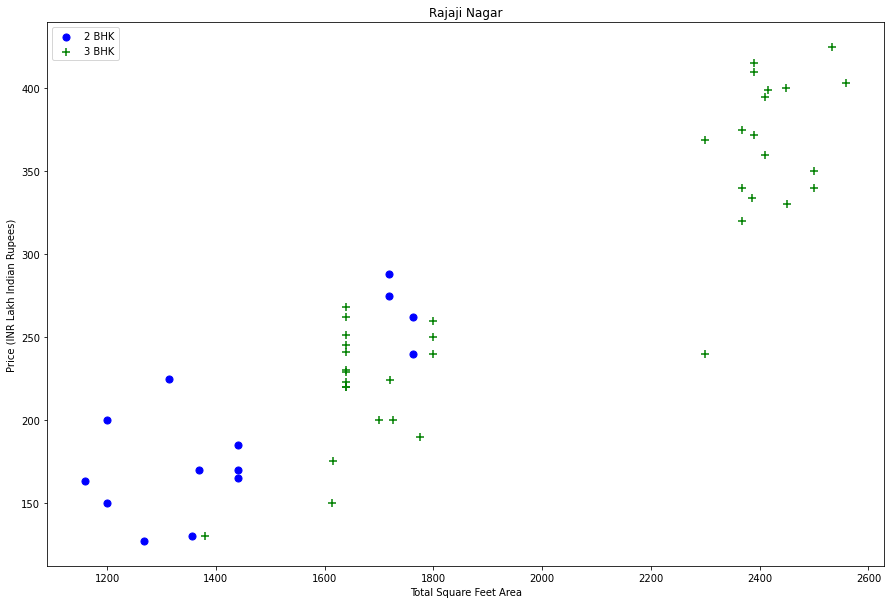

In [56]:
plot_scatter_chart(df=df7,location='Rajaji Nagar')

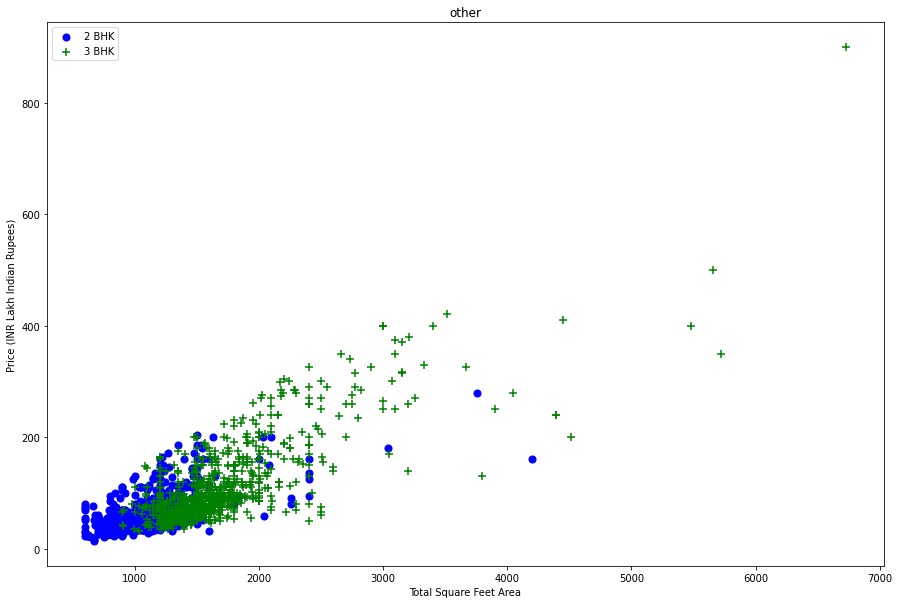

In [57]:
plot_scatter_chart(df7, "other")

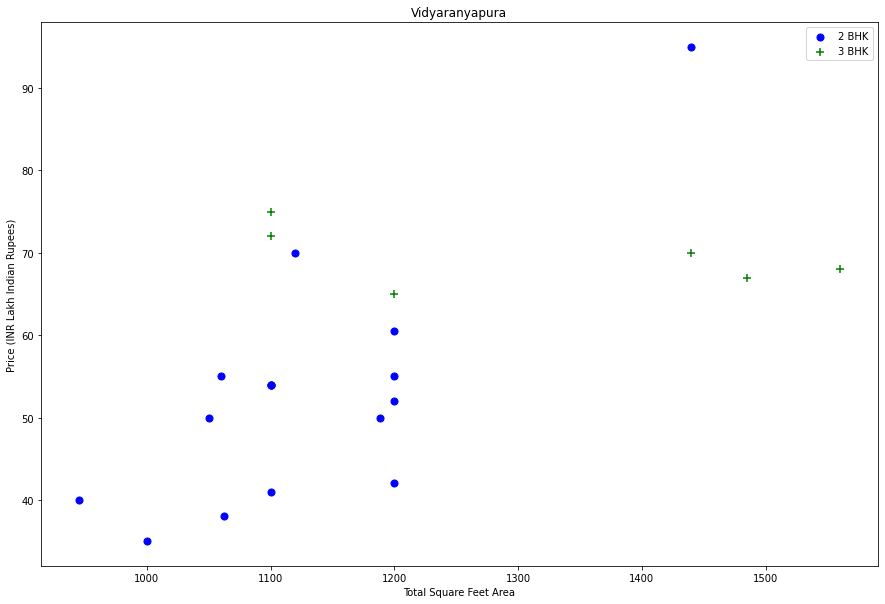

In [58]:
plot_scatter_chart(df7, 'Vidyaranyapura')

*We should also remove attribute where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). W <br>at we will do is for a given location, we will build a dictionary of stats per bhk, i.e.*  <br>
{ <br>
    '1' : { <br>
        'mean': 4000, <br>
        'std': 2000,  <br>
        'count': 34  <br>
    },  <br>
    '2' : {  <br>
        'mean': 4300, <br>
        'std': 2300, <br>
        'count': 22 <br>
    },    <br>
} <br> <br>
**remove outlier**

In [59]:
def remove_bhk_price_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [60]:
df8 = remove_bhk_price_outliers(df7)
df8.shape

(7329, 6)

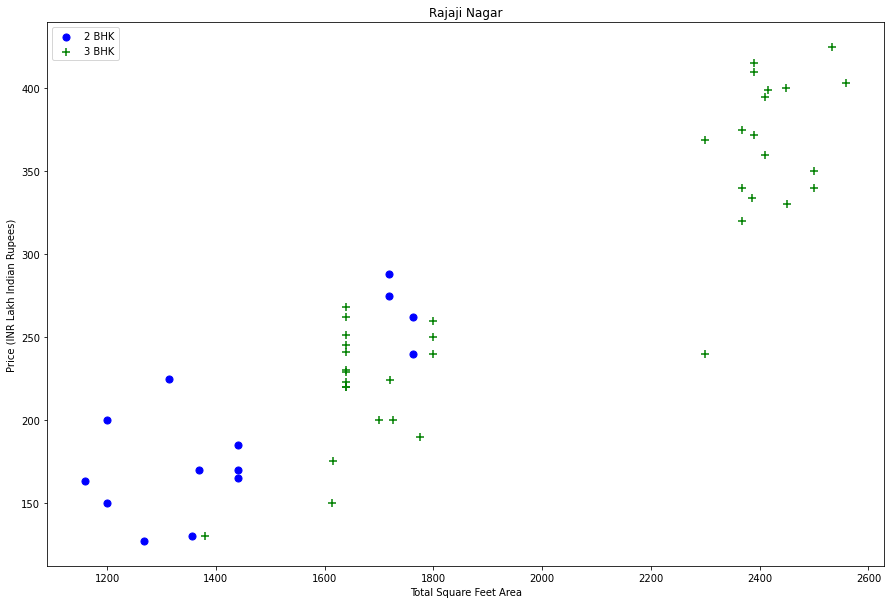

In [61]:
plot_scatter_chart(df7, 'Rajaji Nagar')

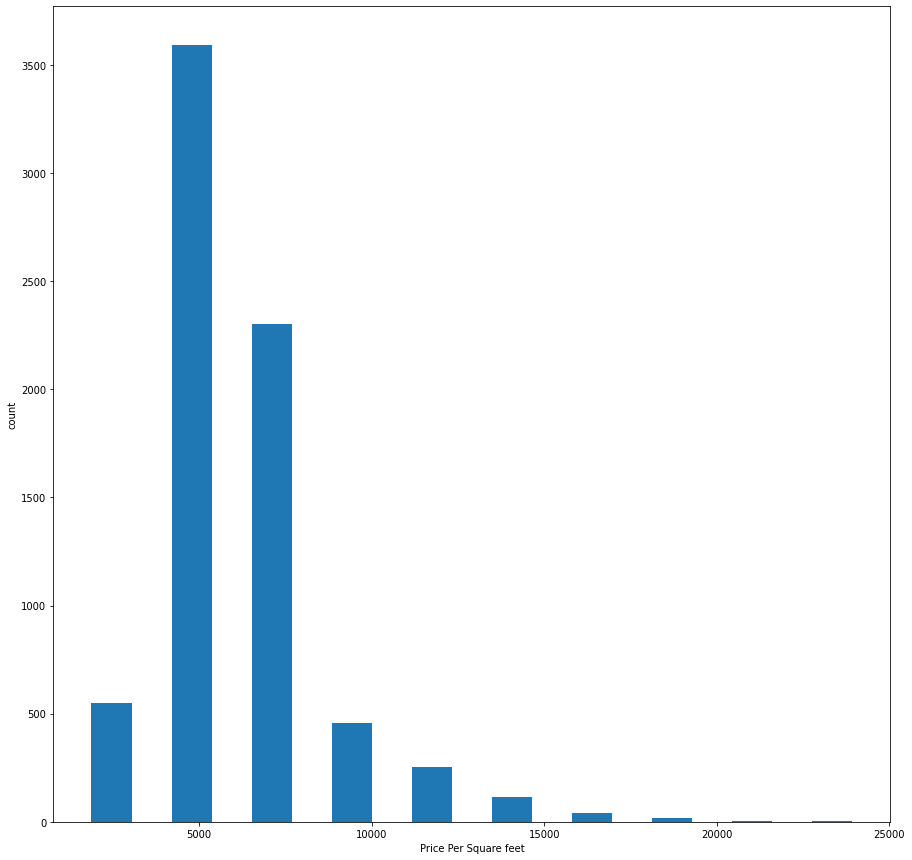

In [62]:
matplotlib.rcParams['figure.figsize'] = (15, 15)
plt.hist(df8.price_per_sqft, rwidth=0.5)
plt.xlabel('Price Per Square feet')
plt.ylabel('count')
plt.show()

**Observation from above Graph** i.e. Majority of our data point in beetweent range of 0 to 10000 per square feet price

**Now check Bathroom Feature is there any outlier**

In [63]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [64]:
df8.bath.max()

16.0

In [65]:
df8[df8.bath>10].head(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8486,other,12000.0,12.0,525.0,10,4375.000000
8575,other,10000.0,16.0,550.0,16,5500.000000
9308,other,6000.0,12.0,150.0,11,2500.000000
9639,other,5425.0,13.0,275.0,13,5069.124424


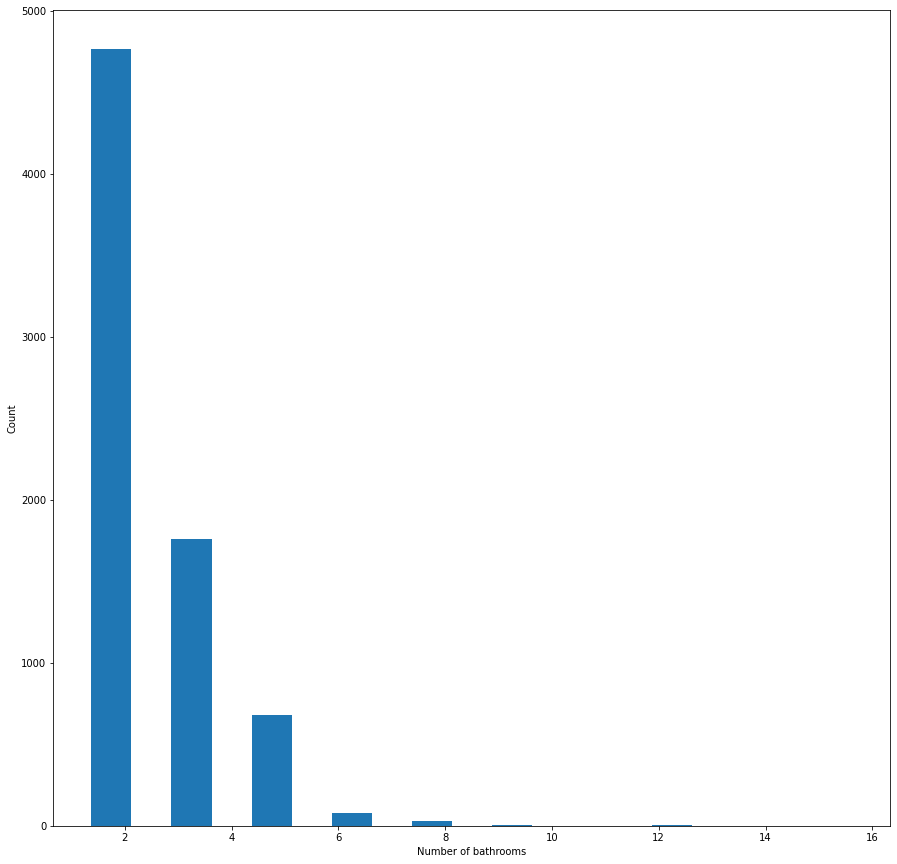

In [66]:
plt.hist(df8.bath, rwidth=0.5)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')
plt.show()

In [67]:
df8[df8.bath>df8.bhk+2].head(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8411,other,11338.0,9.0,1000.0,6,8819.897689


**Observation:**  Here we can see that there are 4 bhk but bathrooms are 7 i.e quite unusual that means that is outlier we have to remove this. for this we can remove one by one or using function based on count.

In [68]:
df9 = df8[~(df8.bath>df8.bhk+2)]

In [69]:
df9.shape

(7325, 6)

In [70]:
# Now drop price per sqft no further use
df10 = df9.drop(['price_per_sqft'],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [100]:
df10.describe()

,total_sqft,bath,price,bhk
count,7325.000000,7325.000000,7325.000000,7325.000000
mean,1490.987844,2.449147,98.624691,2.499386
std,850.203664,1.007773,92.364452,0.927554
min,300.000000,1.000000,10.000000,1.000000
25%,1095.000000,2.000000,50.000000,2.000000
50%,1259.000000,2.000000,73.000000,2.000000
75%,1675.000000,3.000000,112.000000,3.000000
max,30000.000000,16.000000,2200.000000,16.000000


## hot encoding of location...

In [71]:
dummy_set = pd.get_dummies(df10.location)
dummy_set.head(10)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
#Now combine other attributes and remove other due to if we not drop we can lost 1st Block Jayanager
df11 = pd.concat([df10,dummy_set.drop('other', axis='columns')], axis='columns')
df11.head(10)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Block Jayanagar,2750.0,4.0,413.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Block Jayanagar,2450.0,4.0,368.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1st Phase JP Nagar,1875.0,3.0,167.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1st Phase JP Nagar,1500.0,5.0,85.0,5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1st Phase JP Nagar,2065.0,4.0,210.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
#Location is already covered so we can drop location
df12 = df11.drop(['location'], axis='columns')
df12.head(10)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2750.0,4.0,413.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2450.0,4.0,368.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1875.0,3.0,167.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1500.0,5.0,85.0,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,2065.0,4.0,210.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df12.shape

(7325, 245)

## Set the X and Y value for model 

In [75]:
x = df12.drop(['price'],axis='columns')
x.head(10)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2750.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2450.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1875.0,3.0,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1500.0,5.0,5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,2065.0,4.0,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [77]:
x.shape, y.shape

((7325, 244), (7325,))

## Train Test Split

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=219)

In [80]:
x_test.shape, y_test.shape, x_train.shape, y_train.shape

((1465, 244), (1465,), (5860, 244), (5860,))

## Import Linear Regression 

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
price_linear_reg = LinearRegression()

In [83]:
price_linear_reg.fit(x_train,y_train)

LinearRegression()

In [84]:
price_linear_reg.score(x_train,y_train)

0.8492295289612412

In [85]:
price_linear_reg.intercept_

-1.6142578897695046

In [86]:
price_linear_reg.coef_

array([ 7.96783696e-02,  4.60573288e+00, -2.87429537e+00,  1.11712545e+02,
        8.70721406e+00, -6.05627426e+01,  1.41818325e+02, -7.67813199e+01,
       -3.97410516e+01, -1.41394997e+01, -1.73993847e+01, -4.72519641e+01,
       -4.50737767e+01, -3.59796818e+01, -5.33306050e+01, -4.35441154e+01,
       -2.85588019e+01, -3.06602200e+01, -3.72674747e+01, -4.28600571e+01,
       -4.59431696e+01, -3.45186340e+01, -5.16079327e+01, -4.23963572e+01,
       -3.55264257e+01, -3.41473489e+01, -1.06573727e+01,  1.96210133e+01,
       -3.13942395e+01, -5.19363325e+01, -2.92675904e+01, -1.69194836e+01,
       -3.21721141e+01,  8.84732576e+01, -2.68970911e+01, -6.40671908e+01,
       -6.44813752e+01, -3.13168899e+01, -1.83752427e+01, -1.46560094e+01,
       -3.27764025e+01,  2.76971960e+01,  1.03303526e+01, -5.04259200e+01,
       -5.24343457e+01, -5.77298256e+01, -3.34696137e+01,  1.44022385e+02,
       -4.45137326e+01, -3.01948835e+01, -2.85871089e+01,  8.17242158e+00,
       -3.79554013e+01, -

In [87]:
y_pred = price_linear_reg.predict(x_test)

In [88]:
## Check error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [89]:
mean_absolute_error(y_test,y_pred)

18.053515580409325

In [90]:
mean_absolute_percentage_error(y_test,y_pred)

0.19915417601183177

In [91]:
np.sqrt(mean_squared_error(y_test,y_pred))

33.65934532289557

**Use K Fold cross validation to measure accuracy of our LinearRegression model**

In [92]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.85435491, 0.83563607, 0.82369758, 0.84409753, 0.81649097])

### Find best model using GridSearchCV

In [93]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [94]:
np.where(x.columns == "1st Block Jayanagar")[0][0]

3

In [95]:
def predict_house_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    j = np.zeros(len(x.columns))
    j[0] = sqft
    j[1] = bath
    j[2] = bhk
    if loc_index >= 0:
        j[loc_index] = 1

    return price_linear_reg.predict([j])[0]

In [96]:
predict_house_price("1st Block Jayanagar", 1000, 2, 2)

C:\MyProgram\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


193.23953210723326

In [97]:
predict_house_price("1st Block Jayanagar", 1000, 3, 3)

C:\MyProgram\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


194.9709696179798

In [98]:
predict_house_price('Indira Nagar',1000, 2, 2)

C:\MyProgram\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


167.63634259857164

In [99]:
predict_house_price("1st Block Jayanagar",sqft=2850, bath=4, bhk=4)

C:\MyProgram\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


344.1073908642787

## Export the model in pickel file

In [102]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(price_linear_reg,f)

**Export location and column information to a file that will be useful later on in our prediction application**

In [103]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))